24/08/06 23:20:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Timestamp, MTO_13-FI-11415.PV, MTO_13-PIC-12105.PV, MTO_13-TI-12103.PV, MTO_13-FI-12101.PV, MTO_13-FI-12101-H.PV, MTO_13-FI-12102.PV, MTO_13-FI-12102-H.PV, MTO_13-FI-12112.PV, MTO_13-FI-12112-H.PV, MTO_13-FI-12129.PV, MTO_13-FI-12129-H.PV, MTO_13-FIC-12102.PV, MTO_13-FIC-12112.PV, MTO_13-FIC-12129.PV, MTO_13-PI-12101.PV, MTO_13-PI-12102.PV, MTO_13-PI-12106.PV, MTO_13-PI-12112.PV, MTO_13-PI-12117.PV, MTO_13-PI-12128.PV, MTO_13-PI-12129.PV, MTO_13-TI-12101.PV, MTO_13-TI-12102.PV, MTO_13-TI-12105.PV, MTO_13-TI-12112.PV, MTO_13-TI-12113.PV, MTO_13-TI-12129.PV, MTO_13-TI-12130.PV, MTO_13-PI-12670.PV, MTO_13-PIA-12630.PV, MTO_13-PISA-12642.PV, MTO_13-PISA-12671.PV, MTO_13-SI-12631A.PV, MTO_13-FI-12661.PV, MTO_13-FI-12662.PV, MTO_13-FIA-12663.PV, MTO_13-FIA-12664.PV, MTO_13-FIA-12695.PV, MTO_13-FIA-12696.PV, MTO_13-FIA-12697.PV, MTO_13-FIA-12698.PV, MTO_13-FINSA-12660.PV, MTO_13-FINSA-12665.PV, MTO_13

Dữ liệu ban đầu:
         Timestamp  MTO_13-FI-11415.PV  MTO_13-PIC-12105.PV  \
0  6/11/2022 12:00         65901.75781              0.14921   
1  6/11/2022 12:10         66234.44531              0.14884   
2  6/11/2022 12:20         66225.75781              0.14762   
3  6/11/2022 12:30         65884.88281              0.14784   
4  6/11/2022 12:40         66787.54688              0.14714   

   MTO_13-TI-12103.PV  MTO_13-FI-12101.PV  MTO_13-FI-12101-H.PV  \
0            29.30403         67581.94531               2.06562   
1            29.33455         68212.92969               2.11083   
2            29.36505         67270.43750               2.07104   
3            29.35537         66948.46875               2.04801   
4            29.33456         67765.24219               2.09888   

   MTO_13-FI-12102.PV  MTO_13-FI-12102-H.PV  MTO_13-FI-12112.PV  \
0         77759.72656               1.20945         65943.66406   
1         78432.14062               1.23610         66087.30469   


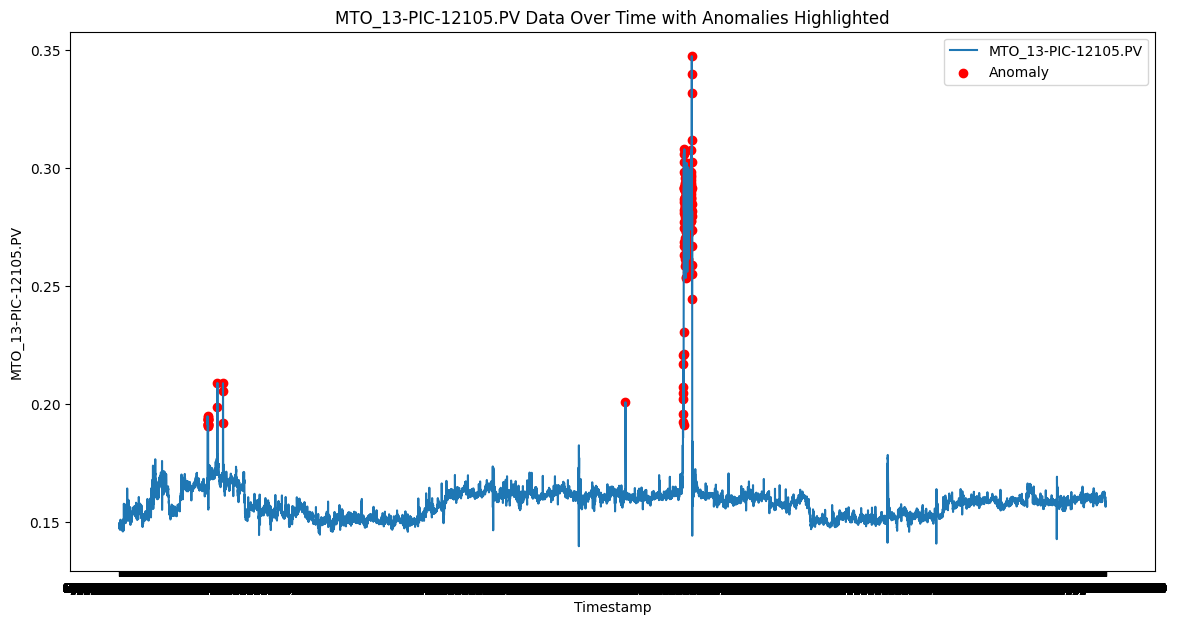

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from pyspark.sql import SparkSession

# Tạo Spark session
spark = SparkSession.builder.appName("AnomalyDetection").getOrCreate()

# Đọc file CSV bằng Spark
file_path = "../../../data/becamex-data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
pandas_df = df.toPandas()
column_timestamp= "MonitorDate"
# Hiển thị dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(pandas_df.head())

# Chọn đặc trưng cụ thể để phân tích
feature = 'COD'
data_feature = pandas_df[feature].dropna().values.reshape(-1, 1)

# Áp dụng phương pháp Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(data_feature)
anomaly_indices = np.where(anomalies == -1)[0]

# Vẽ biểu đồ dữ liệu với các điểm bất thường được đánh dấu
plt.figure(figsize=(14, 7))
plt.plot(pandas_df[column_timestamp], pandas_df[feature], label=feature)
plt.scatter(pandas_df.iloc[anomaly_indices][column_timestamp], pandas_df.iloc[anomaly_indices][feature], color='red', label='Anomaly')
plt.xlabel(column_timestamp)
plt.ylabel(feature)
plt.title(f'{feature} Data Over Time with Anomalies Highlighted')
plt.legend()
plt.show()
